In [66]:
import duckdb
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from obsq.utils.core import convert_df_to_gdf
path = "/home/manat/projects/obsq/work/dev/data/data.duckdb"
target = 'expert_match'


In [67]:
con = duckdb.connect(path)
df = con.execute("""SELECT* FROM features.observer""" ).df()
con.close()


In [68]:
df.shape

(2620, 23)

In [69]:
df.describe()

,observations_count,total_pct,class_count,order_count,family_count,genus_count,species_count,unique_day_count,unique_month_count,unique_year_count,...,max_coord_un,avg_media_count,id_agree_count,id_agree_pct,id_disagree_count,id_disagree_pct,avg_description_len,expert_match_count,expert_match_pct,expert_match_total_pct
count,2620.000000,2620.000000,2620.000000,2620.000000,2620.000000,2620.000000,2620.000000,2620.000000,2620.000000,2620.000000,...,2.620000e+03,2579.000000,2620.000000,2620.000000,2620.000000,2620.000000,304.000000,2620.000000,2620.000000,2620.000000
mean,18.132824,0.038086,1.781679,5.180916,6.960687,10.112977,11.518321,3.496947,1.617939,1.573282,...,2.715399e+04,1.466712,23.408015,1.430191,0.126718,0.015271,49.024967,1.477099,7.208344,0.003085
std,93.079798,0.195936,1.049213,6.698613,11.982630,23.977625,31.197300,5.259112,0.983358,1.392848,...,2.523345e+05,0.906548,111.102522,0.529333,0.548499,0.094456,49.722494,9.298323,19.094428,0.019574
min,1.000000,0.002000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,0.002000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,9.000000e+00,1.000000,2.000000,1.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000
50%,3.000000,0.006000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,1.000000,1.000000,...,6.500000e+01,1.000000,4.000000,1.250000,0.000000,0.000000,34.350000,0.000000,0.000000,0.000000
75%,8.000000,0.017000,2.000000,6.000000,7.000000,8.000000,8.000000,3.000000,2.000000,2.000000,...,1.953000e+03,1.605000,11.000000,1.750000,0.000000,0.000000,59.330000,0.000000,0.000000,0.000000
max,3025.000000,6.367000,5.000000,39.000000,98.000000,255.000000,376.000000,31.000000,4.000000,15.000000,...,8.099594e+06,11.200000,3369.000000,5.000000,9.000000,1.000000,297.220000,276.000000,100.000000,0.581000


In [70]:
df.describe(include=[object], exclude= [float, int])

,recordedBy
count,2620
unique,2620
top,emiletousse
freq,1


In [76]:
def plot_dist(df,col, log:bool = False):
    output = "/home/manat/projects/obsq/work/dev/data/eda/features/observer"

    f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 4]))
    sns.ecdfplot(df, x = col, ax=axs[0], log_scale= log)
    sns.kdeplot(df, x = col, ax=axs[1],log_scale= log)
    f.suptitle(f"Observer distribution of {col}")

    f.savefig(f"{output}/{col}_dist.jpg", dpi = 300, bbox_inches="tight")

    plt.show()

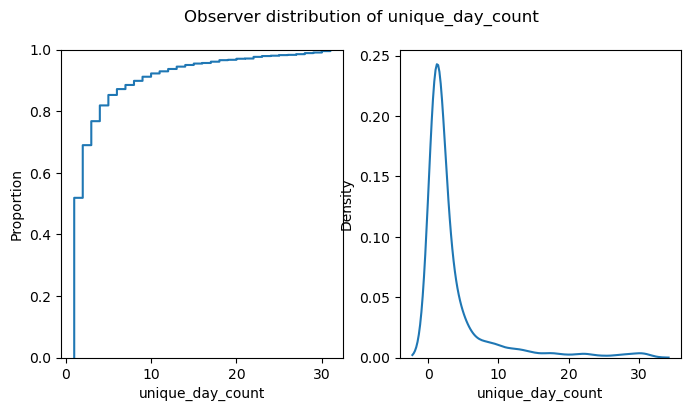

In [78]:
plot_dist(df, "unique_day_count")

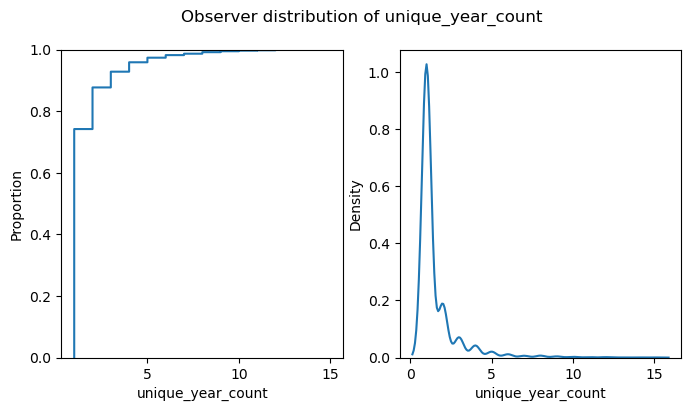

In [80]:
plot_dist(df,"unique_year_count")


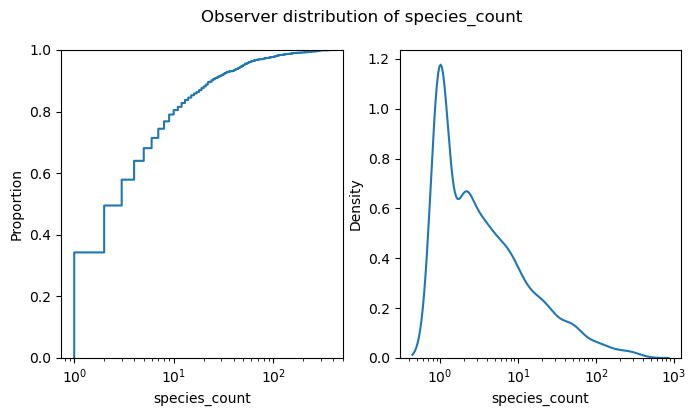

In [81]:
plot_dist(df, "species_count", log = True)

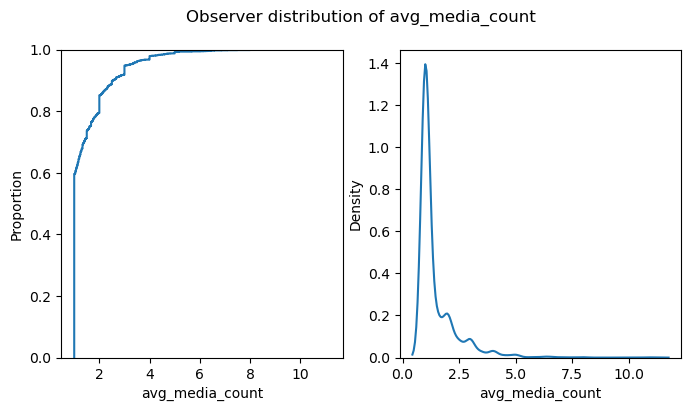

In [83]:
plot_dist(df, "avg_media_count")

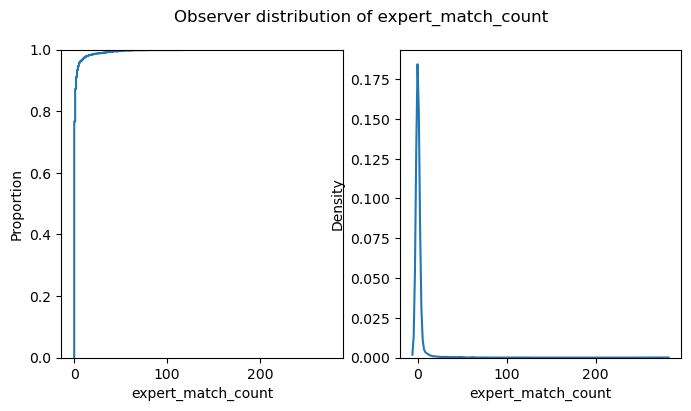

In [86]:
plot_dist(df, "expert_match_count")

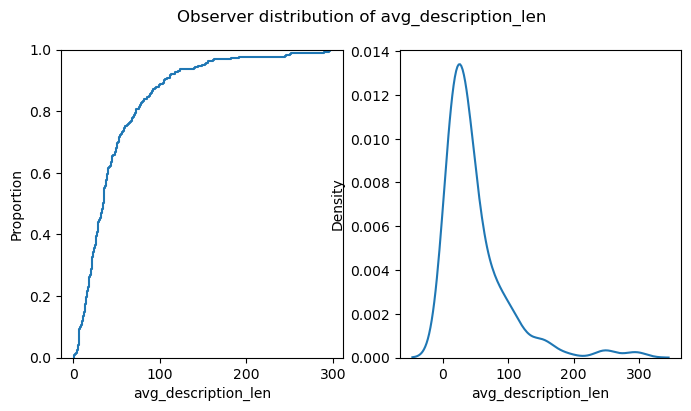

In [87]:

plot_dist(df, "avg_description_len")